In [ ]:
#importing keras libraries 

#!pip install tensorflow
from tensorflow.keras import losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Splitting the folder into training, testing and validation

import splitfolders
splitfolders.ratio('/nalayathiran/flowers', output="/nalayathiran/output", seed=1337, ratio=(.8,0.1,0.1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ValueError: ignored

In [ ]:
#Generate train data and test data using ImageDataGenerator function
 
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range=0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Fetching xtrain and xtest for image classification

xtrain = train_datagen.flow_from_directory('/nalayathiran/output/train',target_size=(220,220),class_mode= 'categorical', batch_size=100)
xtest = test_datagen.flow_from_directory('/nalayathiran/output/test',target_size=(220,220),class_mode= 'categorical', batch_size=100)

Found 3460 images belonging to 5 classes.
Found 436 images belonging to 5 classes.


In [ ]:
#importing Sequential model and required libraries for classification using Convlutional Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
#Creating an instance of sequential model and add convolution layers into it

model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(220,220,3)))

In [ ]:
#Add a max pooling layer with a size of 2*2
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

#This softmax activation is used for the classification of images into 5 classes
model.add(Dense(5,activation='softmax'))


In [ ]:
#Compile the model
model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
#fit the model xtrain and validate using xtest
model.fit(xtrain, steps_per_epoch=len(xtrain), epochs=30,validation_data=xtest, validation_steps=len(xtest))

Epoch 1/30
35/35 [==============================] - 58s 1s/step - loss: 14.9801 - accuracy: 0.3165 - val_loss: 1.4287 - val_accuracy: 0.4312
Epoch 2/30
35/35 [==============================] - 45s 1s/step - loss: 1.2508 - accuracy: 0.5029 - val_loss: 1.2090 - val_accuracy: 0.5459
Epoch 3/30
35/35 [==============================] - 46s 1s/step - loss: 1.1164 - accuracy: 0.5621 - val_loss: 1.1133 - val_accuracy: 0.5780
Epoch 4/30
35/35 [==============================] - 45s 1s/step - loss: 1.0101 - accuracy: 0.6208 - val_loss: 1.1140 - val_accuracy: 0.5849
Epoch 5/30
35/35 [==============================] - 45s 1s/step - loss: 0.9523 - accuracy: 0.6332 - val_loss: 1.0604 - val_accuracy: 0.5826
Epoch 6/30
35/35 [==============================] - 45s 1s/step - loss: 0.8795 - accuracy: 0.6749 - val_loss: 1.0522 - val_accuracy: 0.6032
Epoch 7/30
35/35 [==============================] - 45s 1s/step - loss: 0.8381 - accuracy: 0.6772 - val_loss: 0.9883 - val_accuracy: 0.6330
Epoch 8/30
35/35 [=

In [ ]:
#Save the model as flower-predict.h5
model.save('/content/drive/MyDrive/nalayathiran/flower_predict.h5')

In [ ]:
#Image classification part
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
# Loading a sample image for testing the classifier
img = image.load_img('/content/drive/MyDrive/nalayathiran/output/val/daisy/10994032453_ac7f8d9e2e.jpg',target_size=(220,220))

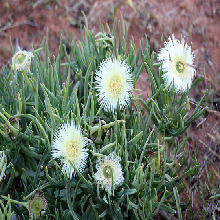

In [ ]:
img #Output image

In [ ]:
x= image.img_to_array(img) # Covert image date into array of rgb values

In [ ]:
x

array([[[ 85.,  55.,  63.],
        [101.,  71.,  79.],
        [110.,  80.,  92.],
        ...,
        [124.,  87.,  95.],
        [110.,  78.,  93.],
        [ 89.,  65.,  79.]],

       [[ 92.,  68.,  68.],
        [ 91.,  71.,  72.],
        [106.,  81.,  84.],
        ...,
        [115.,  78.,  85.],
        [103.,  77.,  80.],
        [ 87.,  67.,  76.]],

       [[ 90.,  63.,  68.],
        [ 86.,  65.,  70.],
        [101.,  76.,  80.],
        ...,
        [108.,  73.,  79.],
        [ 98.,  70.,  84.],
        [ 84.,  63.,  68.]],

       ...,

       [[ 95., 127.,  80.],
        [106., 133.,  90.],
        [124., 159., 129.],
        ...,
        [ 55.,  60.,  30.],
        [ 77.,  63.,  60.],
        [102.,  90., 136.]],

       [[ 96., 128.,  79.],
        [105., 134.,  90.],
        [125., 160., 127.],
        ...,
        [ 58.,  67.,  48.],
        [ 84.,  79., 133.],
        [ 32.,  41.,  24.]],

       [[ 90., 122.,  75.],
        [ 93., 124.,  82.],
        [120., 1

In [ ]:
x=np.expand_dims(x,axis=0) #expand the dimension of the array 

In [ ]:
model.predict(x) # Predict the output of classification

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
op=['daisy','dandelion','rose','sunflower','tulip']

In [ ]:

# Finding the maximum argument value of prediction and print the corresponding predicted output
pred = np.argmax(model.predict(x))


In [ ]:
op[pred]

'daisy'

In [ ]:
# We provided daisy image as input and got the classification output as "Daisy"
# Model Accuracy = 88.24%